import Tensorflow and libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load data using a Keras utility

Create a dataset

In [7]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [15]:
batch_size = 32
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58388 files belonging to 400 classes.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2000 files belonging to 400 classes.


In [28]:
class_names = train_ds.class_names

AttributeError: 'PrefetchDataset' object has no attribute 'class_names'

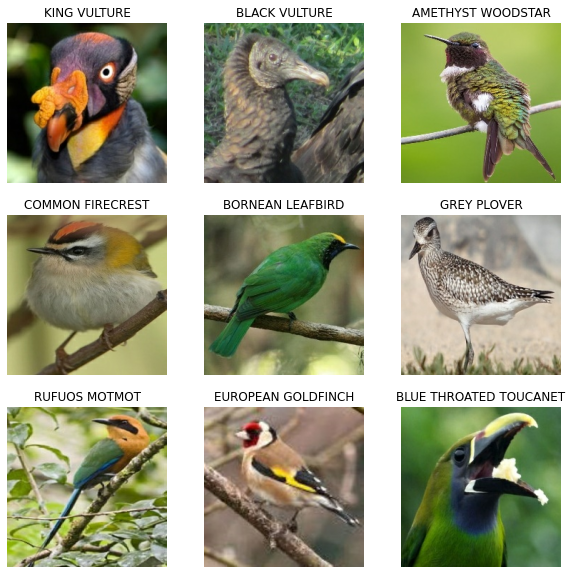

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

In [20]:
normalization_layer = layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [22]:
num_classes = len(class_names)
print(num_classes)

400


In [23]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [26]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
1825/1825 [==============================] - 606s 328ms/step - loss: 4.3889 - accuracy: 0.1495 - val_loss: 2.8031 - val_accuracy: 0.3715
Epoch 2/25
1825/1825 [==============================] - 591s 324ms/step - loss: 2.4575 - accuracy: 0.4511 - val_loss: 2.0331 - val_accuracy: 0.5275
Epoch 3/25
1825/1825 [==============================] - 596s 326ms/step - loss: 1.4696 - accuracy: 0.6434 - val_loss: 2.0242 - val_accuracy: 0.5400
Epoch 4/25
1825/1825 [==============================] - 597s 327ms/step - loss: 0.7390 - accuracy: 0.8037 - val_loss: 2.5678 - val_accuracy: 0.5165
Epoch 5/25
1825/1825 [==============================] - 574s 314ms/step - loss: 0.3597 - accuracy: 0.8981 - val_loss: 3.1974 - val_accuracy: 0.5010
Epoch 6/25
1825/1825 [==============================] - 575s 315ms/step - loss: 0.2318 - accuracy: 0.9317 - val_loss: 3.8103 - val_accuracy: 0.5005
Epoch 7/25
1825/1825 [==============================] - 572s 314ms/step - loss: 0.1838 - accuracy: 0.9463 - val_

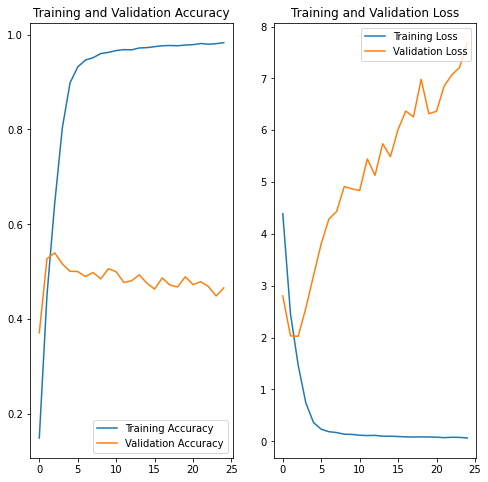

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()